# Tugas Kecil 1 - Breast Cancer

## Import Library dan Datasets yang Dibutuhkan

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn import metrics
from matplotlib import pyplot as plt
from id3 import export_graphviz, export_text

## Preprocess Train dan Test Data

In [9]:
#load data
breast_cancer = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)

#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train dan Predict Data - Decision Tree

In [26]:
#train data tanpa param tambahan
clf = tree.DecisionTreeClassifier(random_state=0)
clf_train = clf.fit(X_train, y_train)

#train data dengan param tambahan
clf_param = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf_param_train = clf_param.fit(X_train, y_train)

#predict Result
clf_test = clf_train.predict(X_test)
clf_param_test = clf_param_train.predict(X_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(metrics.accuracy_score(y_test, clf_test)))
print("Dengan Parameter Max Depth:\t" + str(metrics.accuracy_score(y_test, clf_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(metrics.f1_score(y_test, clf_test)))
print("Dengan Parameter Max Depth:\t" + str(metrics.f1_score(y_test, clf_param_test)))

print()

print("Tree Model Tanpa Parameter:")
#Modelling
model = tree.export_text(clf_train, feature_names=list(breast_cancer.feature_names))
print(model)

Accuracy Score:
Tanpa Parameter:		0.9122807017543859
Dengan Parameter Max Depth:	0.9649122807017544

F1 Score:
Tanpa Parameter:		0.923076923076923
Dengan Parameter Max Depth:	0.9705882352941176

Tree Model Tanpa Parameter:
|--- worst concave points <= 0.14
|   |--- worst area <= 957.45
|   |   |--- worst perimeter <= 107.75
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- mean concavity <= 0.14
|   |   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |   |   |--- mean texture <= 19.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- mean texture >  19.90
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |   |   |--- worst texture <= 32.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst textur

## Pembahasan - Decision Tree

Dari hasil percobaan di atas dapat terlihat bahwa penggunaan algoritma Decision Tree cukup baik untuk memprediksi penentuan breast cancer atau tidaknya seseorang. Akurasi yang dicapai berkisar 91-96%, dimana angka ini termasuk cukup tinggi. Namun yang perlu diperhatikan adalah adanya perbedaan nilai antara model decision tree yang didefinisikan max_depth-nya dengan yang tidak. Perbedaannya pun cukup jauh yaitu sekitar 5% (model yang memiliki parameter 96% sedangkan yang tidak hanya 91%). 

Hipotesa kami, hal ini dikarenakan ketika suatu decision tree tidak definisikan max_depth-nya maka secara otomatis ia akan membuat depth sedalam mungkin berdasarkan hasil di tiap iterasi yang ia lakukan. Berbeda dengan jika max_depth-nya sudah ditentukan ia akan berhenti iterasi ketika max_depth-nya tercapai. Hal ini berpengatuh ketika dilakukan testing karena data testing kita tidak tahu sevariasi apa sehingga depth yang dalam hanya membuat "syarat" yang ketat untuk sebuah kasus untuk diklasifikasikan ke kelas apa. Berbeda dengan depth yang tidak terlalu dalam membuat sebuah kasus lebih bebas untuk diklasifikasikan ke kelas apa. Peristiwa ini sering disebut dengan "overfit" atau model tree yang dibuat terlalu benar untuk training data namun tidak cukup benar untuk test data.

## Train dan Predict Data - ID3Estimator

In [34]:
#train data tanpa param tambahan
clf = Id3Estimator()
clf_train = clf.fit(X_train, y_train)

#train data dengan param tambahan
clf_param = Id3Estimator(gain_ratio=True)
clf_param_train = clf_param.fit(X_train, y_train)

#predict Result
clf_test = clf_train.predict(X_test)
clf_param_test = clf_param_train.predict(X_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(metrics.accuracy_score(y_test, clf_test)))
print("Dengan Parameter Gain Ratio:\t" + str(metrics.accuracy_score(y_test, clf_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(metrics.f1_score(y_test, clf_test)))
print("Dengan Parameter Gain Ratio:\t" + str(metrics.f1_score(y_test, clf_param_test)))

print()

print("Tree Model Tanpa Parameter:")
#Modelling
model = export_text(clf_train.tree_, breast_cancer.feature_names)
print(model)

Accuracy Score:
Tanpa Parameter:		0.9122807017543859
Dengan Parameter Gain Ratio:	0.956140350877193

F1 Score:
Tanpa Parameter:		0.9242424242424243
Dengan Parameter Gain Ratio:	0.9618320610687023

Tree Model Tanpa Parameter:

worst concave points <=0.14
|   worst perimeter <=107.75
|   |   symmetry error <=0.02
|   |   |   radius error <=0.55
|   |   |   |   worst texture <=29.76: 1 (64) 
|   |   |   |   worst texture >29.76
|   |   |   |   |   mean texture <=23.24
|   |   |   |   |   |   mean radius <=12.51: 1 (2) 
|   |   |   |   |   |   mean radius >12.51
|   |   |   |   |   |   |   worst fractal dimension <=0.07: 1 (1) 
|   |   |   |   |   |   |   worst fractal dimension >0.07: 0 (3) 
|   |   |   |   |   mean texture >23.24: 1 (8) 
|   |   |   radius error >0.55: 0 (2) 
|   |   symmetry error >0.02: 1 (189) 
|   worst perimeter >107.75
|   |   worst texture <=20.22: 1 (11) 
|   |   worst texture >20.22
|   |   |   mean symmetry <=0.15: 1 (3) 
|   |   |   mean symmetry >0.15
|   |  

## Pembahasan - ID3Estimator

Sama seperti sebelumnya, algoritma ID3Estimator untuk prediksi di kasus breast cancer ini bekerja cukup baik dengan akurasi sekitar 91-96%. Namun lagi-lagi dengan menambahkan parameter terdapat peningkatan akurasi sekitar 4-5%. Parameter yang ditambahkan adalah penggunaan gain ratio ketika penentuan percabangan. Seperti yang kita ketahui algoritma ID3Estimator ini menggunakan information gain untuk menentukan percabangannya, hanya saja information gain ini terdapat kekurangan ketika menemukan properties yang memiliki sparse value tinggi, seperti tanggal, nama, dll. Nah gain ratio hadir untuk menjawab kekurangan tersebut sehingga hasil perhitungan ID3Estimator pun menjadi lebih tepat. Alasan itu mengapa akurasinya bertambah ketika menggunakan gain ratio dalam modelling treenya.

## Train dan Predict Data - K Means

Accuracy Score:
Tanpa Parameter:		0.8157894736842105
Dengan Parameter n_clusters:	0.8157894736842105

F1 Score:
Tanpa Parameter:		0.8645161290322582
Dengan Parameter n_clusters:	0.8645161290322582



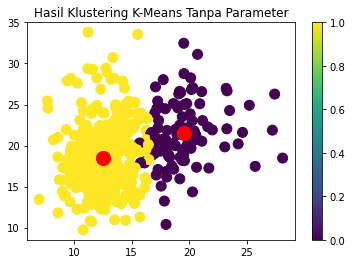

In [58]:
#train data tanpa param tambahan
clf = KMeans(n_clusters=2, random_state=42)
clf_train = clf.fit(X_train, y_train)

#train data dengan param tambahan
clf_param = KMeans(n_clusters=2, init="random", random_state=42)
clf_param_train = clf_param.fit(X_train, y_train)

#predict Result
clf_test = clf_train.predict(X_test)
clf_param_test = clf_param_train.predict(X_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(metrics.accuracy_score(y_test, clf_test)))
print("Dengan Parameter init:\t" + str(metrics.accuracy_score(y_test, clf_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(metrics.f1_score(y_test, clf_test)))
print("Dengan Parameter init:\t" + str(metrics.f1_score(y_test, clf_param_test)))

print()

#Modelling
output = plt.scatter(X_train[:,0], X_train[:,1], s = 100, c = clf.labels_, marker = 'o', alpha = 1, )
centers = clf_train.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title("Hasil Klustering K-Means Tanpa Parameter")
plt.colorbar (output)
plt.show()

## Pembahasan - K Means

Dari hasil yang sudah ditampilkan dapat kita cermati bahwa sepertinya algoritma K-Means untuk prediksi kasus breast cancer bekerja tidak semaksimal algoritma-algoritma sebelumnya, dapat diperhatikan bahwa akurasinya hanya menyentuh angka 81%. Penambahan parameter pun tidak merubah hasilnya, walaupun sebenarnya hal ini masih menjadi pertanyaan kami karena menurut dokumentasinya, default untuk parameter init adalah "k-means++" tetapi ketika diubah menjadi "random" tidak ada perubahan sedikitpun. Parameter init berfungsi untuk menentukan inisiasi centroid ketika melakukan clustering.

## Train dan Predict Data - Logistic Regression

In [70]:
#train data tanpa param tambahan
clf = LogisticRegression(random_state=0, max_iter=10000)
clf_train = clf.fit(X_train, y_train)

#train data dengan param tambahan
clf_param = LogisticRegression(solver='liblinear', random_state=0, max_iter=10000)
clf_param_train = clf_param.fit(X_train, y_train)

#predict Result
clf_test = clf_train.predict(X_test)
clf_param_test = clf_param_train.predict(X_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(metrics.accuracy_score(y_test, clf_test)))
print("Dengan Parameter Solver:\t" + str(metrics.accuracy_score(y_test, clf_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(metrics.f1_score(y_test, clf_test)))
print("Dengan Parameter Solver:\t" + str(metrics.f1_score(y_test, clf_param_test)))

Accuracy Score:
Tanpa Parameter:		0.9473684210526315
Dengan Parameter Solver:	0.956140350877193

F1 Score:
Tanpa Parameter:		0.9538461538461538
Dengan Parameter Solver:	0.9618320610687023


## Pembahasan - Logistic Regression

Algoritma kali ini bekerja dengan cukup baik dengan akurasi mencapai 94-95%. Dapat diperhatikan bahwa perbedaan parameter solver ternyata memberikan hasil akurasi yang berbeda. Peningkatan kecil itu didapatkan ketika menggunakan solver "liblinear", hal ini dikarenakan solver default untuk algoritma ini adalah "lbfgs" dan solver tersebut ternyata baik digunakan untuk multiclass problem (me-refer dokumentasi LogisticRegression pada spek). Sedangkan "libliniear" baik digunakan untuk datasets yang ukurannya tidak terlalu besar. Hal-hal tersebut lah yang sepertinya mengakibatkan perbedaan hasil dan memberikan akurasi yang lebih tinggi untuk solver "libliniear".

## Train dan Predict Data - Neural Network

In [72]:
#train data tanpa param tambahan
clf = MLPClassifier(random_state=0)
clf_train = clf.fit(X_train, y_train)

#train data dengan param tambahan
clf_param = MLPClassifier(solver="sgd", random_state=0)
clf_param_train = clf_param.fit(X_train, y_train)

#predict Result
clf_test = clf_train.predict(X_test)
clf_param_test = clf_param_train.predict(X_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(metrics.accuracy_score(y_test, clf_test)))
print("Dengan Parameter Solver:\t" + str(metrics.accuracy_score(y_test, clf_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(metrics.f1_score(y_test, clf_test)))
print("Dengan Parameter Solver:\t" + str(metrics.f1_score(y_test, clf_param_test)))

Accuracy Score:
Tanpa Parameter:		0.9473684210526315
Dengan Parameter Solver:	0.8771929824561403

F1 Score:
Tanpa Parameter:		0.9552238805970149
Dengan Parameter Solver:	0.8906250000000001


## Pembahasan - Neural Network

Dari hasil di atas algoritma neural network untuk prediksi kasus breast cancer bekerja cukup baik dengan akurasi 94%, walaupun turun jika ditambahkan parameter solver dengan nilai "sgd" atau stochastic gradient descent. Sebenarnya solver default yang digunakan algoritma ini, "adam", berbasis solver "sgd" juga, hanya saja solver "adam" telah dioptimisasi sehingga dalam melakukan weight optimization bekerja secara lebih akurat. Hal itu mengakibatkan tingkat akurasi yang lebih baik dibandingkan dengan "sgd" biasa.

## Train dan Predict Data - SVM

In [75]:
#train data tanpa param tambahan
clf = SVC(random_state=0)
clf_train = clf.fit(X_train, y_train)

#train data dengan param tambahan
clf_param = SVC(kernel='linear', random_state=0)
clf_param_train = clf_param.fit(X_train, y_train)

#predict Result
clf_test = clf_train.predict(X_test)
clf_param_test = clf_param_train.predict(X_test)

#accuracy Score
print("Accuracy Score:")
print("Tanpa Parameter:\t\t" + str(metrics.accuracy_score(y_test, clf_test)))
print("Dengan Parameter Kernel:\t" + str(metrics.accuracy_score(y_test, clf_param_test)))

print()

#f1 Score
print("F1 Score:")
print("Tanpa Parameter:\t\t" + str(metrics.f1_score(y_test, clf_test)))
print("Dengan Parameter Kernel:\t" + str(metrics.f1_score(y_test, clf_param_test)))

Accuracy Score:
Tanpa Parameter:		0.9298245614035088
Dengan Parameter Solver:	0.956140350877193

F1 Score:
Tanpa Parameter:		0.9428571428571428
Dengan Parameter Solver:	0.9618320610687023


## Pembahasan - SVM

Dari hasil di atas dapat disimpulkan bahwa algoritma SVM bekerja cukup baik untuk kasus prediksi breast_cancer dengan akurasi 92-95%. Dapat diperhatikan bahwa penambahan parameter kernel dapat meningkatkan akurasi. Walaupun penulis code sendiri belum memahami secara penuh apa bedanya kernel yang default dengan yang "linear", hanya saja dari dokumentasi yang dibaca hal ini berpengaruh ke dalam pra komputasi kernel matrix ketika mengoperasikan data. Belum diketahui bagaimana pengaruh pengelolaan matriks pra komputasi dapat mempengaruhi kenaikan akurasi.